# ANÁLISIS EXPLORATORIO

# Importación de los datos
Vemos los primeros registros del dataset y los tipos de variables

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
pd.set_option('display.float_format', lambda x: '%.2f' % x)
salaries = pd.read_csv("2017-18_NBA_salary.csv")
print(salaries.head(15))
print(salaries.dtypes)

                 Player    Salary NBA_Country  NBA_DraftNumber  Age   Tm   G  \
0               Zhou Qi    815615       China               43   22  HOU  16   
1         Zaza Pachulia   3477600     Georgia               42   33  GSW  66   
2         Zach Randolph  12307692         USA               19   36  SAC  59   
3           Zach LaVine   3202217         USA               13   22  CHI  24   
4          Zach Collins   3057240         USA               10   20  POR  62   
5          Yogi Ferrell   1312611         USA               62   24  DAL  79   
6          Xavier Silas     74159         USA               62   30  BOS   2   
7   Xavier Rathan-Mayes     46080      Canada               62   23  MEM   5   
8       Wilson Chandler  12016854         USA               23   30  DEN  70   
9     Willy Hernangomez   1435750       Spain               35   23  TOT  45   
10          Willie Reed   1577230         USA               62   27  TOT  42   
11  Willie Cauley-Stein   3704160       

# Calidad de los datos
Veremos si hay datos con valores faltantes o si hay filas repetidas

In [2]:
print(salaries.isna().sum())
print("Número de filas repetidas:", salaries.size-salaries.drop_duplicates().size)

Player             0
Salary             0
NBA_Country        0
NBA_DraftNumber    0
Age                0
Tm                 0
G                  0
MP                 0
PER                0
TS%                2
3PAr               2
FTr                2
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               2
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM                0
VORP               0
dtype: int64
Número de filas repetidas: 0


# Resumen estadístico
Veremos un resumen de estadísticas descriptivas

In [3]:
print(salaries.select_dtypes(include="object").describe(include="all"))
print(salaries.describe())

            Player NBA_Country   Tm
count          485         485  485
unique         483          44   31
top     Kay Felder         USA  TOT
freq             3         374   55
           Salary  NBA_DraftNumber    Age      G      MP    PER    TS%   3PAr  \
count      485.00           485.00 485.00 485.00  485.00 485.00 483.00 483.00   
mean   6636507.50            29.45  26.26  50.17 1154.14  13.26   0.54   0.34   
std    7392601.91            21.13   4.27  24.87  811.36   8.77   0.11   0.23   
min      46080.00             1.00  19.00   1.00    1.00 -41.10   0.00   0.00   
25%    1471382.00            11.00  23.00  29.00  381.00   9.80   0.51   0.17   
50%    3202217.00            25.00  26.00  59.00 1134.00  13.20   0.55   0.35   
75%   10000000.00            47.00  29.00  71.00 1819.00  16.50   0.58   0.48   
max   34682550.00            62.00  41.00  79.00 2898.00 134.10   1.50   1.00   

         FTr   ORB%  ...   TOV%   USG%    OWS    DWS     WS  WS/48   OBPM  \
count 483.00 

De aquí podemos observar algunas particularidades.

Observamos que las columnas que son porcentajes tienen una escala de 0 a 100. Sin embargo, la columna TS% tiene una escala de 0 a 1 -con unos datos atípicos-.

         TS%   ORB%   DRB%   TRB%   AST%   STL%   BLK%   TOV%   USG%
count 483.00 485.00 485.00 485.00 485.00 485.00 485.00 483.00 485.00
mean    0.54   4.87  14.95   9.91  12.95   1.53   1.71  13.14  18.90
std     0.11   4.58   6.85   4.96   9.11   0.99   1.68   6.12   5.94
min     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
25%     0.51   1.80  10.20   6.20   6.90   1.00   0.60   9.90  15.00
50%     0.55   3.20  14.00   8.70   9.90   1.50   1.20  12.50  17.90
75%     0.58   7.00  18.80  13.30  17.60   1.90   2.20  15.75  22.20
max     1.50  35.90  37.60  26.50  49.40  12.50  13.40  66.70  45.10


,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
142,Naz Mitrou-Long,92160,Canada,62,24,UTA,1,1,134.10,1.50,...,0.00,45.10,0.10,0.00,0.10,2.71,68.70,-14.30,54.40,0.00


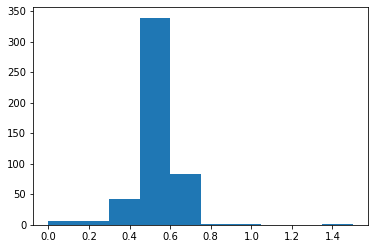

In [4]:
salaries.sort_values(by=["PER"], ascending=False)
perc = list(filter(lambda x: x.endswith("%"), salaries.keys()))
print(salaries[perc].describe())
plt.hist(salaries[perc[0]])
salaries[salaries["TS%"]==1.5]


Además, podemos ver que hay 485 filas. Pero hay 483 jugadores distintos. Hay un jugador que aparece en 3 equipos distintos.

In [5]:
salaries[salaries["Player"]=="Kay Felder"]

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
224,Kay Felder,1312611,USA,54,22,DET,1,3,-31.60,0.00,...,33.30,44.20,-0.10,0.00,-0.10,-1.00,-29.50,-11.90,-41.40,0.00
225,Kay Felder,1312611,USA,54,22,CHI,14,134,3.60,0.39,...,17.40,28.00,-0.50,0.10,-0.50,-0.17,-8.20,-3.30,-11.50,-0.30
226,Kay Felder,1312611,USA,54,22,TOT,15,137,2.90,0.38,...,17.90,28.40,-0.60,0.10,-0.50,-0.18,-8.70,-3.50,-12.10,-0.30


## Correlación de variables
Para identificar la correlación entre las variables del Dataframe se realiza una matriz de correlación. Sin embargo, es de principal interés la variable de salario. Por lo anterior, se extrae únicamente la correlación entre salario y las demás variables, como se muestra a continuación.

In [6]:
salaries.corr()['Salary'].sort_values(ascending=False)

Salary             1.00
WS                 0.59
VORP               0.57
OWS                0.56
MP                 0.51
DWS                0.51
Age                0.34
BPM                0.31
USG%               0.30
G                  0.30
PER                0.27
AST%               0.27
OBPM               0.27
DRB%               0.20
DBPM               0.18
TS%                0.17
WS/48              0.16
TRB%               0.14
BLK%               0.05
STL%               0.04
FTr                0.02
ORB%               0.00
TOV%              -0.04
3PAr              -0.07
NBA_DraftNumber   -0.38
Name: Salary, dtype: float64

El indicador que utiliza para el cálculo de la correlación es el coeficiente de Pearson, que indica la asociación **lineal** entre dos variables. Para la intuición de la relación entre las variables, usando una matriz de correlación, es necesario tener presente las siguientes consideraciones:

* Los valores pueden estar entre -1 y +1
* Un valor igual a 0 indica que no existe una relación lineal entre las dos variables, aunque no necesariamente son independientes.
* Un valor mayor a 0 indica una correlación lineal positiva, es decir, las variables son directamente proporcionales.
* Un valor menor a 0 indica una correlación lineal negativa, es decir, las variables son inversamente proporcionales.

Además, se dice con frecuencia que dos variables están altamente correlacionadas si su coeficiente es mayor o igual que 0.7. Sin embargo, el valor de referencia también depende del área de estudio y la cantidad de elementos en el análisis.

## Gráfica de correlación
A continuación, una gráfica de la matriz de correlación:

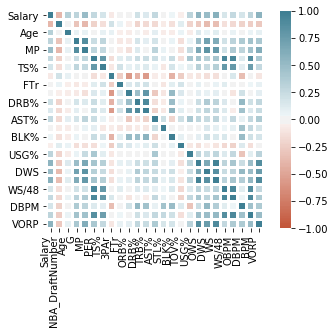

In [7]:
salary_correlation = salaries.corr()
ax = sb.heatmap(
    salary_correlation, 
    linewidth=2,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)
plt.show()

## Analisis de la correlación
De las condiciones del coeficiente de Pearson, inicialmente explicadas, y la gráfica de la matriz se pueden extraer las variables correlacionadas con el salario. Se muestran a continuación las variables escogidas:

In [8]:
salary_correlation = salary_correlation[(salary_correlation['Salary'] > 0.5) | (salary_correlation['Salary'] < -0.30)]
salary_correlation = salary_correlation['Salary']
salary_correlation

Salary             1.00
NBA_DraftNumber   -0.38
MP                 0.51
OWS                0.56
DWS                0.51
WS                 0.59
VORP               0.57
Name: Salary, dtype: float64

Para las variables positivamente correlacionadas fueron escogidas solamente aquellas que excedieran +0.5. En cuanto a las variables negativas, teniendo en cuenta que solo habían tres y sus valores eran más cercanos al 0 que al -1, se escogió la menor.

Acabamos de ver las variables independientes más correlacionadas con la variable dependientes. Ahora veremos las variables independientes más correlacionadas entre ellas:

In [9]:
indep_corr = salaries[salaries.columns.drop("Salary")].corr()
arr = pd.DataFrame(columns=["start", "end", "corr"])
for i in range(indep_corr.columns.size):
    for j in range(indep_corr.columns.size):
        df = pd.DataFrame({"start": [indep_corr.columns[i]],
                    "end": [indep_corr.columns[j]],
                    "corr": [indep_corr.iloc[i, j]]})
        arr = arr.append(df)
        
arr = arr[arr["start"]>arr["end"]]
arr["abs"]=abs(arr["corr"])
arr = arr.sort_values(by=["abs"], ascending=False)[["start", "end", "corr"]]
#arr = arr.set_index(["start", "end"])
arr.index = range(arr.index.size)
print(arr.head(30))

    start   end  corr
0      WS   OWS  0.96
1   WS/48   PER  0.93
2   WS/48  OBPM  0.93
3     PER  OBPM  0.91
4    TRB%  DRB%  0.91
5    OBPM   BPM  0.91
6      WS  VORP  0.91
7      MP     G  0.87
8   WS/48   BPM  0.87
9    VORP   OWS  0.87
10    PER   BPM  0.86
11     WS   DWS  0.84
12     MP   DWS  0.82
13   TRB%  ORB%  0.80
14    TS%  OBPM  0.79
15     WS    MP  0.78
16  WS/48   TS%  0.78
17    TS%   PER  0.78
18   VORP   DWS  0.75
19    TS%   BPM  0.74
20      G   DWS  0.71
21    OWS    MP  0.66
22    OWS   DWS  0.65
23     WS     G  0.63
24   VORP    MP  0.61
25   ORB%  3PAr -0.58
26   TRB%  BLK%  0.57
27   TRB%  3PAr -0.55
28     WS   BPM  0.53
29    DWS  DBPM  0.52
